# 9.6.3 ROC Curves

In [1]:
library(e1071)

In [2]:
set.seed(1)
x <- matrix(rnorm(200 * 2), ncol = 2)
x[1:100,] <- x[1:100,] + 2
x[101:150,] <- x[101:150,] - 2
y <- c(rep(1, 150), rep(2, 50))
dat <- data.frame(x = x, y = as.factor(y))

In [3]:
train <- sample(200, 100)
svmfit <- svm(y ~ ., data = dat[train,], kernel = "radial", gamma = 1, cost = 1)

The `ROCR` package can be used to produce ROC curves such as those in Figures 9.10 and 9.11. We first write a short function to plot an ROC curve given a vector containing a numerical score for each observation, `pred`, and a vector containing the class label for each observation, `truth`.

In [4]:
library(ROCR)
rocplot <- function(pred, truth, ...) {
    predob <- prediction(pred, truth)
    perf <- performance(predob, "tpr", "fpr")
    plot(perf, ...)
}

SVMs and support vector classifiers output class labels for each observation. However, it is also possible to obtain _fitted values_ for each observation, which are the numerical scores used to obtain the class labels. For instance, in the case of a support vector classifier, the fitted value for an observation $X = (X_1, X_2, \ldots, X_p)^T$ takes the form $\hat{\beta_0} + \hat{\beta_1} X_1 + \hat{\beta_2} X_2 + \cdots + \hat{\beta_p} X_p$. For an SVM with a non-linear kernel, the equation that yields the fitted value is given in (9.23). In essence, the sign of the fitted value determines on which side of the decision boundary the observation lies. Therefore, the relationship between the fitted value and the class prediction for a given observation is simple: if the fitted value exceeds zero then the observation is assigned to one class, and if it is less than zero then it is assigned to the other. In order to obtain the fitted values for a given SVM model fit, we use `decision.values = T` when fitting `svm()`. Then the `predict()` funciton will output the fitted values.

In [5]:
svmfit.opt <- svm(y ~ ., data = dat[train,], kernel = "radial", gamma = 2, cost = 1, decision.values = T)
fitted <- attributes( predict(svmfit.opt, dat[train,], decision.values = T))$decision.values

Now we can produce the ROC plot. Note we use the negative of the fitted values so that negative values correspond to class $1$ and positive values to class $2$.

SVM appears to be producing accurate predictions. By increasing $\gamma$ we can produce a more flexible fit and generate further improvements in accuracy.

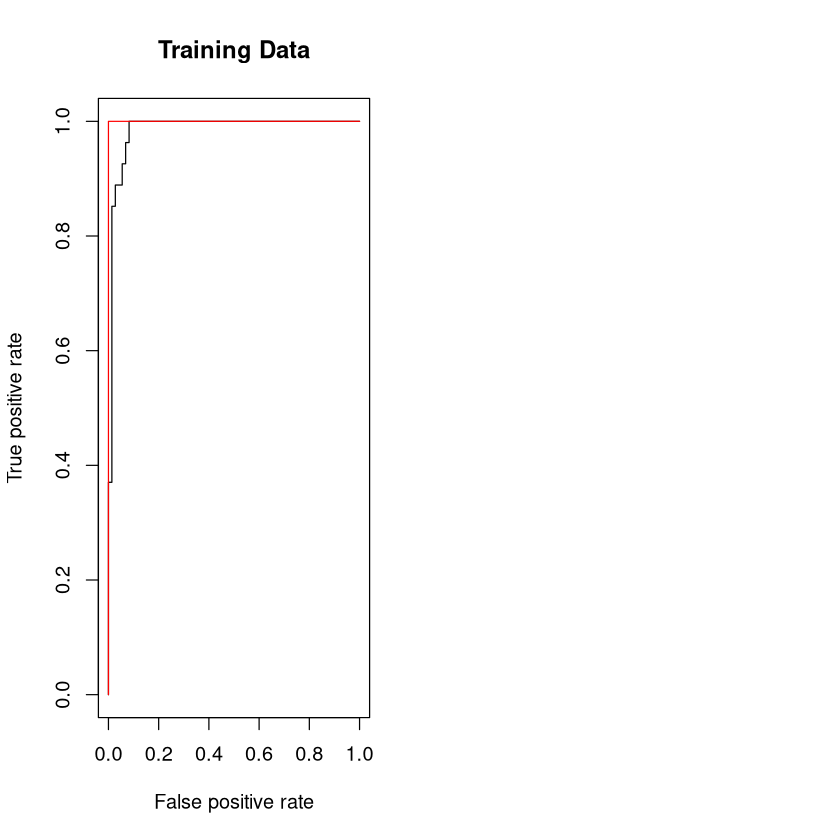

In [6]:
par(mfrow = c(1, 2))
rocplot(-fitted, dat[train, "y"], main = "Training Data")
svmfit.flex <- svm(y ~ ., data = dat[train,], kernel = "radial", gamma = 50, cost = 1, decision.values = T)
fitted <- attributes( predict(svmfit.flex, dat[train,], decision.values = T))$decision.values
rocplot(-fitted, dat[train, "y"], add = T, col = "red")

However, these ROC curves are all on the training data. We are really more interested in the level of prediction accuracy on the test data. When we compute the ROC curves on the test data, the model with $\gamma = 2$ appears to provide the most accurate results.

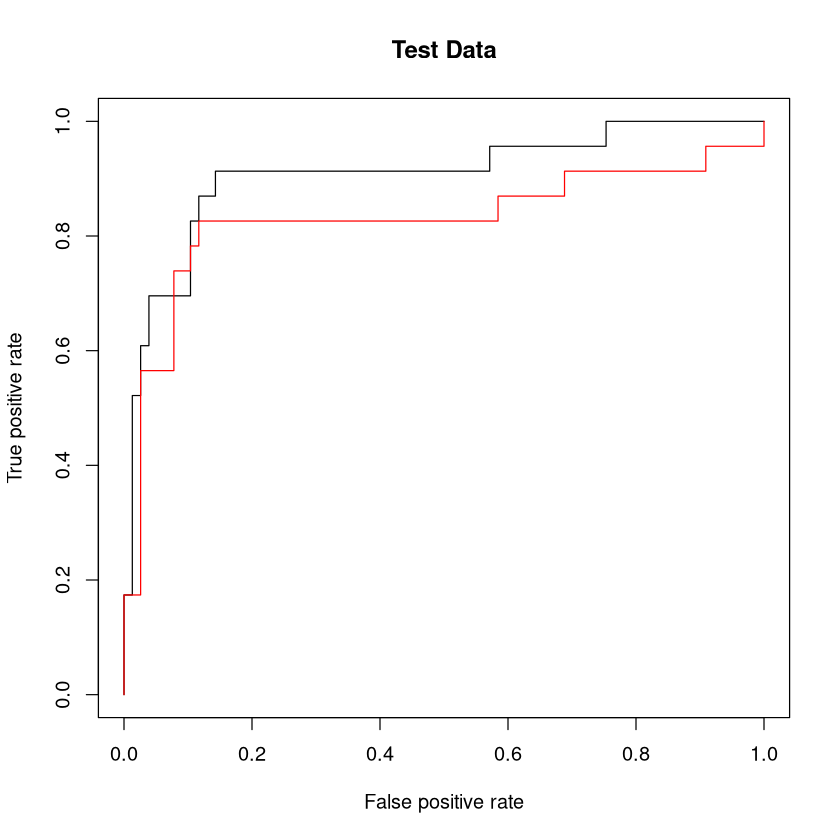

In [7]:
fitted <- attributes( predict(svmfit.opt, dat[-train,], decision.values = T))$decision.values
rocplot(-fitted, dat[-train, "y"], main = "Test Data")
fitted <- attributes( predict(svmfit.flex, dat[-train,], decision.values = T))$decision.values
rocplot(-fitted, dat[-train, "y"], add = T, col = "red")